In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

df = pd.read_csv(r'C:\Users\Fyodor\PycharmProjects\untitled\Coursera\nhanes_2015_2016.csv')

In [118]:
print(df.columns)

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


## 1
Relabel the marital status variable DMDMARTL to have brief but informative
character labels

In [119]:
df['DMDMARTLx'] = df['DMDMARTL'].replace(
    {
        1: 'Married',
        2: 'Widowed',
        3: 'Divorced',
        4: 'Separated',
        5: 'Never married',
        6: 'Living with partner',
        77: 'Refused',
        99: 'Don`t know'
    }
)
df['RIAGENDRx'] = df['RIAGENDR'].replace(
    {
        1: 'Male',
        2: 'Female'
    }
)
df['DMDMARTLx'] = df.DMDMARTLx.fillna('Missing')
print(df.DMDMARTLx.value_counts())
print(df.RIAGENDRx.value_counts())

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64
Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


Then construct a frequency table of these values
for all people,
then for women only,
and for men only

In [120]:
# for all
print(df.DMDMARTLx.value_counts())

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64


In [121]:
# for women and men simultaneously
print(df.groupby('RIAGENDRx')['DMDMARTLx'].value_counts())

RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Missing                 126
           Separated               118
           Refused                   1
Male       Married                1477
           Never married           484
           Living with partner     265
           Divorced                229
           Missing                 135
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64


Then construct these three frequency tables using only people whose age is between 30 and 40

In [122]:
df['age_grp'] = pd.cut(df.RIDAGEYR, [30, 40])
print(df.groupby(['age_grp'])['DMDMARTLx'].value_counts(), end='\n\n')
print(df.groupby(['RIAGENDRx', 'age_grp'])['DMDMARTLx'].value_counts())

age_grp   DMDMARTLx          
(30, 40]  Married                516
          Never married          186
          Living with partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
Name: DMDMARTLx, dtype: int64

RIAGENDRx  age_grp   DMDMARTLx          
Female     (30, 40]  Married                258
                     Never married           97
                     Living with partner     57
                     Divorced                43
                     Separated               17
                     Widowed                  2
Male       (30, 40]  Married                258
                     Never married           89
                     Living with partner     72
                     Divorced                24
                     Separated               12
                     Widowed                  2
                     Refused                  1
Name: DMDMARTLx

## 2

In [123]:
print(df.RIDAGEYR.dropna().describe(), end='\n\n\n') # to investigate the age
df['agev2'] = pd.cut(df.RIDAGEYR, [30, 40, 50, 60, 70, 80])

data = df.groupby('RIAGENDRx')['DMDMARTLx'].value_counts()
print((data / data.sum()).to_string(float_format='%.3f'))

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64


RIAGENDRx  DMDMARTLx          
Female     Married               0.227
           Never married         0.091
           Divorced              0.061
           Widowed               0.052
           Living with partner   0.046
           Missing               0.022
           Separated             0.021
           Refused               0.000
Male       Married               0.258
           Never married         0.084
           Living with partner   0.046
           Divorced              0.040
           Missing               0.024
           Widowed               0.017
           Separated             0.012
           Refused               0.000


In [124]:
data_with_age = df.groupby(['RIAGENDRx', 'agev2'])['DMDMARTLx'].value_counts()
# TODO - get rid of Nan
x = (data_with_age / data_with_age.sum()).unstack()
print(x.to_string(float_format='%.3f'))

DMDMARTLx           Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
RIAGENDRx agev2                                                                                       
Female    (30, 40]     0.010                0.013    0.058          0.022      NaN      0.004    0.000
          (40, 50]     0.016                0.008    0.065          0.014      NaN      0.007    0.003
          (50, 60]     0.019                0.007    0.058          0.009    0.000      0.006    0.006
          (60, 70]     0.019                0.004    0.048          0.009      NaN      0.005    0.015
          (70, 80]     0.013                0.001    0.029          0.005      NaN      0.002    0.042
Male      (30, 40]     0.005                0.016    0.058          0.020    0.000      0.003    0.000
          (40, 50]     0.008                0.007    0.063          0.009      NaN      0.002    0.000
          (50, 60]     0.013                0.008    0.067          0.011

# 3

Histogram

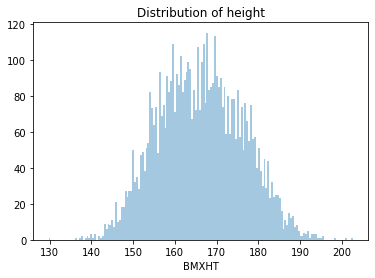

In [125]:
hist = sns.distplot(df.BMXHT.dropna(), bins=160, kde=False).set_title('Distribution of height')
plt.show()

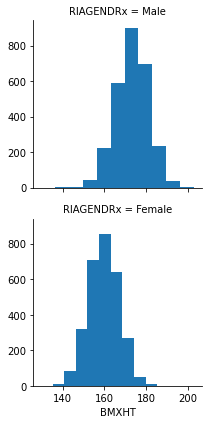

In [126]:
side_by_side = sns.FacetGrid(df, row= 'RIAGENDRx')
side_by_side =side_by_side.map(plt.hist, 'BMXHT')


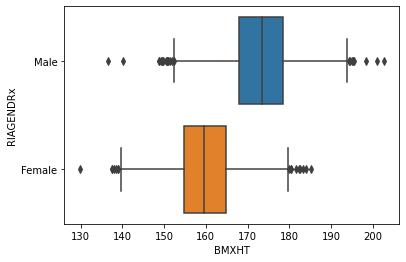

In [127]:
boxplots = sns.boxplot(x=df['BMXHT'], y=df['RIAGENDRx'], data=df)
plt.show()

# 5

In [128]:
df['Education'] = df['DMDEDUC2'].replace({1: '<9',
                                           2: '9-11',
                                           3: 'HS/GED',
                                           4: 'Some college/AA',
                                           5: 'College',
                                           7: 'Refused',
                                           9: 'Don`t know'
                                           }
                                          )
df['Household'] = df['DMDHHSIZ']
df['Education'] = df.Education.fillna('Missing').dropna()
df['Household'] = df.Household.fillna('Missing').dropna()
v = df.groupby(['Education'])['Household'].value_counts()
print(v, end='\n\n\n\n\n')

print(v.unstack())

print(type(v), type(v.unstack()), sep='\n')  # !!!!!!!!!!!!!!!!!

Education        Household
9-11             2            143
                 3            105
                 4             98
                 5             94
                 1             75
                 6             73
                 7             55
<9               2            147
                 5             97
                 3             96
                 4             87
                 7             85
                 1             72
                 6             71
College          2            475
                 3            265
                 4            226
                 1            195
                 5            130
                 6             40
                 7             35
Don`t know       2              2
                 5              1
HS/GED           2            321
                 3            203
                 4            192
                 1            181
                 5            130
                 7   

In [129]:
# Proportions
v = v.unstack().apply(lambda x: x / x.sum(), axis=1)
print(v, end='\n\n\n{}\n\n'.format('-'*90))
print(v.to_string(float_format='%.3f'))

Household               1         2         3         4         5         6  \
Education                                                                     
9-11             0.116641  0.222395  0.163297  0.152411  0.146190  0.113530   
<9               0.109924  0.224427  0.146565  0.132824  0.148092  0.108397   
College          0.142753  0.347731  0.193997  0.165447  0.095168  0.029283   
Don`t know            NaN  0.666667       NaN       NaN  0.333333       NaN   
HS/GED           0.152614  0.270658  0.171164  0.161889  0.109612  0.065767   
Missing          0.007663  0.084291  0.210728  0.226054  0.187739  0.134100   
Some college/AA  0.151141  0.268970  0.193091  0.169031  0.122147  0.050586   

Household               7  
Education                  
9-11             0.085537  
<9               0.129771  
College          0.025622  
Don`t know            NaN  
HS/GED           0.068297  
Missing          0.149425  
Some college/AA  0.045034  


----------------------------------

In [130]:
household = df.groupby(['RIAGENDRx', 'age_grp', 'Education'])['Household'].value_counts()
print(household.unstack())

Household                              1     2     3     4     5     6     7
RIAGENDRx age_grp  Education                                                
Female    (30, 40] 9-11              2.0   7.0   2.0   7.0  11.0   9.0   4.0
                   <9                1.0   2.0   4.0   7.0  10.0  13.0   9.0
                   College          14.0  23.0  34.0  49.0  18.0   7.0   4.0
                   HS/GED            2.0   2.0  16.0  15.0  14.0  15.0  14.0
                   Some college/AA   2.0  16.0  29.0  43.0  42.0  12.0  15.0
Male      (30, 40] 9-11              2.0   6.0  10.0  16.0  16.0  13.0   6.0
                   <9                NaN   2.0   7.0   7.0  12.0   5.0  14.0
                   College          12.0  24.0  28.0  33.0  12.0   4.0   2.0
                   HS/GED           10.0  13.0  16.0  24.0  17.0  11.0  13.0
                   Some college/AA  17.0  15.0  18.0  27.0  25.0  13.0   8.0


### Q5b

In [131]:
data = df.groupby(['age_grp', 'Education', 'RIAGENDRx'])['Household'].describe()
print(data)

                                    count      mean       std  min   25%  50%  \
age_grp  Education       RIAGENDRx                                              
(30, 40] 9-11            Female      42.0  4.452381  1.727855  1.0  3.25  5.0   
                         Male        69.0  4.463768  1.529895  1.0  3.00  5.0   
         <9              Female      46.0  5.130435  1.529106  1.0  4.00  5.0   
                         Male        47.0  5.127660  1.568952  2.0  4.00  5.0   
         College         Female     149.0  3.476510  1.407431  1.0  3.00  4.0   
                         Male       115.0  3.252174  1.369104  1.0  2.00  3.0   
         HS/GED          Female      78.0  4.769231  1.594822  1.0  3.25  5.0   
                         Male       104.0  4.057692  1.805208  1.0  3.00  4.0   
         Some college/AA Female     159.0  4.276730  1.431614  1.0  3.00  4.0   
                         Male       123.0  3.804878  1.753958  1.0  2.00  4.0   

                           

In [132]:
# New dataframe
df_new = df[['RIAGENDRx', 'RIDAGEYR', 'Education', 'Household']]
df_new_30_40 = df_new[(df_new.RIDAGEYR >= 30) & (df_new.RIDAGEYR <= 40)] # limit new df to ages 30-40

data = df_new_30_40.groupby(['RIAGENDRx', 'Education'])['Household']
print(data.describe())

print(data.median())

                           count      mean       std  min  25%  50%   75%  max
RIAGENDRx Education                                                           
Female    9-11              49.0  4.408163  1.669810  1.0  3.0  5.0  6.00  7.0
          <9                49.0  5.102041  1.544411  1.0  4.0  5.0  6.00  7.0
          College          174.0  3.367816  1.411062  1.0  2.0  3.0  4.00  7.0
          HS/GED            84.0  4.809524  1.571402  1.0  4.0  5.0  6.00  7.0
          Some college/AA  176.0  4.267045  1.443109  1.0  3.0  4.0  5.00  7.0
Male      9-11              74.0  4.405405  1.534256  1.0  3.0  4.5  5.75  7.0
          <9                47.0  5.127660  1.568952  2.0  4.0  5.0  7.00  7.0
          College          129.0  3.178295  1.383212  1.0  2.0  3.0  4.00  7.0
          HS/GED           113.0  4.053097  1.811869  1.0  3.0  4.0  5.00  7.0
          Some college/AA  131.0  3.847328  1.716317  1.0  3.0  4.0  5.00  7.0
RIAGENDRx  Education      
Female     9-11          

# 6
The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables
SDMVSTRA and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR),
within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [135]:
# create new dataframes for Males and Females
data_m = df.where(df.RIAGENDRx == 'Male')
data_m = data_m.dropna()
data_f = df.where(df.RIAGENDRx == 'Female').dropna()
data_f = data_f.dropna()

ageM = data_m.groupby(['SDMVSTRA','SDMVPSU'])['RIDAGEYR']
print(ageM.value_counts())
print(ageM.mean())
heightM = data_m.groupby(['SDMVSTRA','SDMVPSU'])['BMXHT']
print(heightM.mean())
bmiM = data_m.groupby(['SDMVSTRA','SDMVPSU'])['BMXBMI']
print(bmiM.value_counts())
print(bmiM.mean())

ageW = data_f.groupby(['SDMVSTRA','SDMVPSU'])['RIDAGEYR']
print(ageW.value_counts())
print(ageW.mean())
heightW = data_f.groupby(['SDMVSTRA','SDMVPSU'])['BMXHT']
print(heightM.mean())
bmiW = data_f.groupby(['SDMVSTRA','SDMVPSU'])['BMXBMI']
print(bmiW.value_counts())
print(bmiW.mean())

# report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.
pattern = '{0}: {1}'
pattern2 = '{0} {1} {2}: {3}'
parameters = {1: ('Male', 'Female'), 2: ('age', 'height', 'BMI'), 3: ('max', 'min', 'ratio')}
print(pattern.format('Male age max', ageM.mean().max()))
print(pattern.format('Male age min', ageM.mean().min()))
print(pattern.format('Male age ratio', ageM.mean().max()/ageM.mean().min()))

print(pattern.format('Male height ratio', heightM.mean().max()/heightM.mean().min()))
print(pattern.format('Male BMI ratio', bmiM.mean().max()/bmiM.mean().min()))

print(pattern2.format(parameters[1][1], parameters[2][0], parameters[3][0], ageW.mean().max()))
print(pattern2.format(parameters[1][1], parameters[2][0], parameters[3][1], ageW.mean().min()))
print(pattern2.format(parameters[1][1], parameters[2][0], parameters[3][2],
                      round(ageW.mean().max()/ageW.mean().min(), 3)))

print(heightW.mean().max()/heightW.mean().min())
print(bmiW.mean().max()/bmiW.mean().min())

SDMVSTRA  SDMVPSU  RIDAGEYR
119.0     1.0      33.0        1
120.0     1.0      39.0        1
122.0     1.0      35.0        1
123.0     1.0      40.0        1
125.0     2.0      40.0        1
127.0     1.0      35.0        1
128.0     2.0      40.0        1
130.0     2.0      38.0        1
131.0     2.0      38.0        1
132.0     1.0      37.0        1
                   40.0        1
          2.0      35.0        1
                   39.0        1
Name: RIDAGEYR, dtype: int64
SDMVSTRA  SDMVPSU
119.0     1.0        33.0
120.0     1.0        39.0
122.0     1.0        35.0
123.0     1.0        40.0
125.0     2.0        40.0
127.0     1.0        35.0
128.0     2.0        40.0
130.0     2.0        38.0
131.0     2.0        38.0
132.0     1.0        38.5
          2.0        37.0
Name: RIDAGEYR, dtype: float64
SDMVSTRA  SDMVPSU
119.0     1.0        173.40
120.0     1.0        169.60
122.0     1.0        174.70
123.0     1.0        191.20
125.0     2.0        180.50
127.0     1.0        

## IQR of these MVU`s  6b

In [163]:
data_modified = df[['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx', 'BMXHT', 'BMXBMI',
                    'RIDAGEYR']]  # new dataframe

data_q3 = data_modified.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'], axis=0).quantile(0.75)
# print(data_q3)
data_q1 = data_modified.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'], axis=0).quantile(0.25)

data_iqr = data_q3 - data_q1
data_iqr.rename_axis('IQR', axis=1, inplace=True)

print(data_iqr)


for i in ('BMXHT', 'BMXBMI', 'RIDAGEYR'):
    x = data_iqr[i].max()/data_iqr[i].min()
    out = '{0} IQR ratio: {1}'.format(i, round(x, 3))
    print(out)

IQR                          BMXHT  BMXBMI  RIDAGEYR
SDMVSTRA SDMVPSU RIAGENDRx                          
119      1       Female      9.325   9.750     31.25
                 Male        9.000   5.350     29.75
         2       Female      9.950   9.350     33.50
                 Male       11.225   5.300     29.00
120      1       Female      8.750   8.775     26.50
                 Male       12.125   9.400     23.75
         2       Female     10.550   7.750     25.75
                 Male       10.500   7.100     26.00
121      1       Female      9.150   9.000     26.25
                 Male       10.725   7.500     34.50
         2       Female      9.600   8.100     26.00
                 Male        8.600   5.700     25.50
122      1       Female     10.400   9.875     24.00
                 Male        9.400   7.700     29.50
         2       Female      7.575   8.475     25.00
                 Male       10.150   4.100     30.00
123      1       Female      9.675  10.450    